In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# utility functions to get Cityscapes Pytorch dataset and dataloaders
from pipeline.utils import get_cs_datasets
from pipeline.utils import *

data= get_cs_datasets(rootDir='pipeline/data')
sample_image, sample_label = data[0]
print(f"Input shape = {sample_image.shape}, output label shape = {sample_label.shape}")

Input shape = (512, 1024, 3), output label shape = torch.Size([512, 1024])


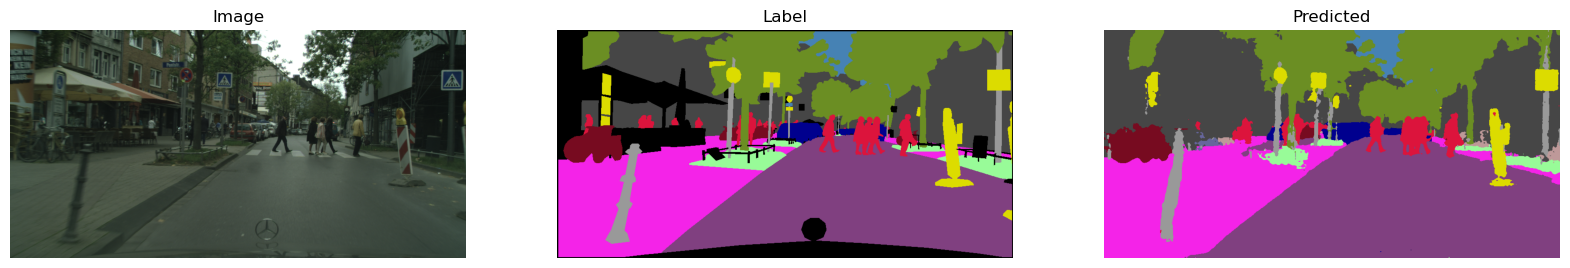

In [23]:
from pipeline.utils import train_id_to_color as cs_train_id_to_color

rgb_image, label = data[1]
output= cv2.imread("pipeline/data/predicted/aachen_000048_000019.png",cv2.IMREAD_GRAYSCALE)
cm_labels = (train_id_to_color[output]).astype(np.uint8)
output_pred = cm_labels[..., ::-1] # Rearrange channels to be  RGB as CV2 thinks train_id_to_color is BGR
output_pred=cv2.cvtColor(output_pred, cv2.COLOR_BGR2RGB)
label = label.cpu().detach().numpy()

# plot sample image
fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].imshow(rgb_image);
axes[0].set_title("Image");
axes[0].axis('off');
axes[1].imshow(cs_train_id_to_color[label]);
axes[1].set_title("Label");
axes[1].axis('off');
axes[2].imshow(output_pred);
axes[2].set_title("Predicted");
axes[2].axis('off');

True


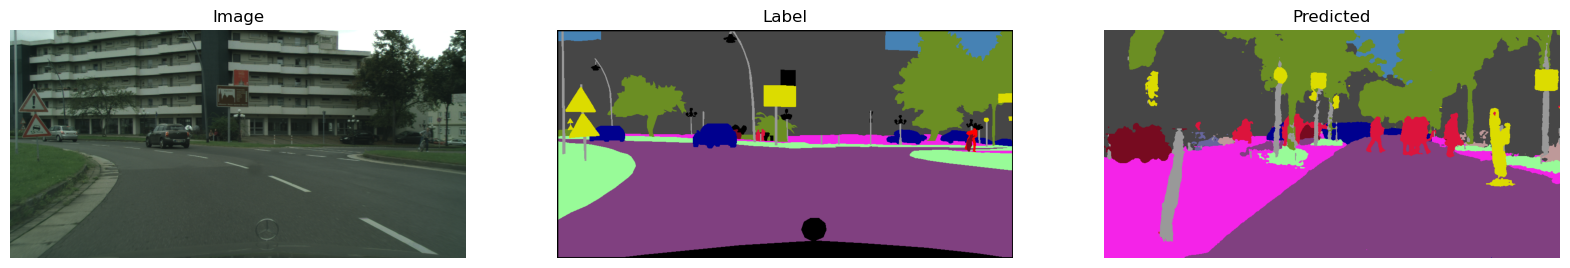

In [22]:
rgb_image, label = data[0]
output= cv2.imread("pipeline/data/predicted/aachen_000000_000019.png",cv2.IMREAD_GRAYSCALE)
cm_labels = (train_id_to_color[output]).astype(np.uint8)
output_pred = cm_labels[..., ::-1] # Rearrange channels to be  RGB as CV2 thinks train_id_to_color is BGR
output_pred=cv2.cvtColor(output_pred, cv2.COLOR_BGR2RGB)
label = label.cpu().detach().numpy()

label_pred= color_to_label_image(cs_train_id_to_color[label],cs_train_id_to_color)
print(np.all(label==label_pred))
# plot sample image
fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].imshow(rgb_image);
axes[0].set_title("Image");
axes[0].axis('off');
axes[1].imshow(cs_train_id_to_color[label]);
axes[1].set_title("Label");
axes[1].axis('off');
axes[2].imshow(output_pred);
axes[2].set_title("Predicted");
axes[2].axis('off');